In [75]:
import pandas as pd
import os 
import sys
import matplotlib.pyplot as plt
sys.path.append("../")
from src import soporte_preprocesamiento as sp
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

import json


In [76]:
df = pd.read_csv("datos/api_rent_madrid.csv", sep=';' ,index_col = 0).reset_index()

In [77]:
df.head(2)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.00,chalet,rent,371.00,False,6,3,Numancia de la Sagra,Toledo,Numancia de la Sagra,es,400.675.955,-38.225.891,False,40116,UGENA VILLAGE INMOBILIARIA GESTIONA en exclusi...,False,good,False,1.00,"{'typology': 'chalet', 'subTypology': 'indepen...","{'subtitle': 'Numancia de la Sagra', 'title': ...",False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.00,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN


In [78]:
sp.eda(df)              #En primer lugar vamos a observar los datos.

El número de filas es 450 y el número de columnas es 38

----------

En este conjunto de datos tenemos 8 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


description               0.22
hasVideo                  4.00
status                    4.00
newDevelopment            4.00
priceByArea               4.00
detailedType              4.00
suggestedTexts            4.00
hasPlan                   4.00
has3DTour                 4.00
has360                    4.00
hasStaging                4.00
superTopHighlight         4.00
topNewDevelopment         4.00
externalReference        23.33
floor                    18.67
district                 24.89
neighborhood             61.33
hasLift                   6.89
parkingSpace             68.89
labels                   93.33
newDevelopmentFinished   96.22
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
propertyCode,450.00,"94,635,146.39","13,858,169.73","666,696.00","97,564,945.50","98,660,320.50","98,894,324.25","98,939,685.00"
numPhotos,450.00,21.90,9.67,0.00,15.00,21.00,28.00,72.00
price,450.00,671.80,85.10,340.00,640.00,700.00,740.00,750.00
size,450.00,68.24,35.66,20.00,47.25,62.00,80.00,371.00
rooms,450.00,1.70,0.97,0.00,1.00,2.00,2.00,6.00
bathrooms,450.00,1.21,0.44,1.00,1.00,1.00,1.00,3.00
distance,450.00,"22,455.77","17,001.69",183.00,"7,104.25","20,294.00","34,979.75","59,919.00"
priceByArea,432.00,11.86,5.36,1.00,8.00,11.00,15.00,33.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
propertyType,450,6,flat,356
operation,450,1,rent,450
address,450,405,"Calle Valle de Ambles, 2",10
province,450,5,Madrid,358
municipality,450,96,Madrid,170
country,450,1,es,450
latitude,450,433,404.430.651,10
longitude,450,433,-34.659.877,10
description,449,427,VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar co...,10
hasVideo,432,2,False,314



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            450 non-null    int64  
 1   numPhotos               450 non-null    int64  
 2   price                   450 non-null    float64
 3   propertyType            450 non-null    object 
 4   operation               450 non-null    object 
 5   size                    450 non-null    float64
 6   exterior                450 non-null    bool   
 7   rooms                   450 non-null    int64  
 8   bathrooms               450 non-null    int64  
 9   address                 450 non-null    object 
 10  province                450 non-null    object 
 11  municipality            450 non-null    object 
 12  country                 450 non-null    object 
 13  latitude                450 non

None

In [79]:
df = df[df['province'] == 'Madrid']         #Nos quedamos solo con los valores de Madrid, porque solo queremos predecir 
df = df.reset_index(drop=True)              #MADRID

In [80]:
df['parkingSpace'] = df['parkingSpace'].fillna('{}')        #cambiamos los nulos por los corchetes para realizar el apli


In [81]:
def extract_values_categoria(dictionary):
    """
    Extrae valores específicos del JSON de la columna parking space.

    Args:
    dictionary (str): Cadena JSON que describe el espacio de estacionamiento.

    Returns:
    tuple: Valores extraídos (hasParkingSpace, isParkingSpaceIncludedInPrice, parkingSpacePrice).
    """
    try:
        # Verificar que sea una cadena y realizar correcciones necesarias
        if isinstance(dictionary, str):
            dictionary = dictionary.replace("'", '"').replace("True", '"True"').replace("False", '"False"')

        # Cargar la cadena como JSON
        res = json.loads(dictionary)

        # Extraer los valores requeridos
        hasParkingSpace = res.get('hasParkingSpace')
        isParkingSpaceIncludedInPrice = res.get('isParkingSpaceIncludedInPrice')
        parkingSpacePrice = res.get('parkingSpacePrice')

        return hasParkingSpace, isParkingSpaceIncludedInPrice, parkingSpacePrice

    except (json.JSONDecodeError, AttributeError, TypeError) as e:
        # Manejar errores de formato o claves faltantes
        print(f"Error al procesar el JSON: {e}")
        return None, None, None

In [82]:
#realizamos el apli para sacar el json de la columna parkinspace
df[['hasParkingSpace','isParkingSpaceIncludedInPrice','parkingSpacePrice']] = df['parkingSpace'].apply(lambda x: pd.Series(extract_values_categoria(x)))

In [83]:
def extract_values_categoria(dictionary):
    print(dictionary)
    b = dictionary.replace('\'', '\"')
    res = json.loads(b)
    print(res)
    typology = res.get('typology')

    subTypology = res.get('subTypology')
    return typology, subTypology

In [84]:
df['detailedType'] = df['detailedType'].fillna('{}')

In [85]:
#realizamos el apli para sacar el json de la columna detailtype
df[['typology', 'subTypology']] = df['detailedType'].apply(lambda x: pd.Series(extract_values_categoria(x)))

{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat', 'subTypology': 'penthouse'}
{'typology': 'flat', 'subTypology': 'penthouse'}
{'typology': 'flat'}
{'typology': 'flat'}
{}
{}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat', 'subTypology': 'studio'}
{'typology': 'flat', 'subTypology': 'studio'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat', 'subTypology': 'duplex'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'flat'}
{'typology': 'chalet', 'subTypology': 'independantHouse'}
{'typology': 'ch

In [86]:
df.head(2)

,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,province,municipality,country,latitude,longitude,showAddress,distance,description,hasVideo,status,newDevelopment,priceByArea,detailedType,suggestedTexts,hasPlan,has3DTour,has360,hasStaging,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,typology,subTypology
0,91615378,12,750.00,flat,rent,60.00,True,1,1,"Calle de Alejandro Villegas, 23",Madrid,Madrid,es,404.646.164,-36.489.179,True,7037,LOFT DE DISEÑO. Orientación Este. Muy soleado ...,False,good,False,13.00,{'typology': 'flat'},"{'subtitle': 'Canillas, Madrid', 'title': 'Pis...",False,False,False,False,False,False,AV23,3,Hortaleza,Canillas,True,{},NaN,NaN,None,None,NaN,flat,None
1,88363329,21,750.00,flat,rent,70.00,True,2,1,Gregorio izquierdo,Madrid,San Sebastián de los Reyes,es,405.500.865,-36.278.085,False,16145,"Estupendo piso muy iluminado, recientemente re...",True,good,False,11.00,{'typology': 'flat'},"{'subtitle': 'Centro Urbano, San Sebastián de ...",True,False,False,False,False,False,NaN,bj,Centro Urbano,NaN,False,{},NaN,NaN,None,None,NaN,flat,None


In [87]:
#Vamos a quedarnos con las columnas que de verdad pueden afectar a la prediccion del precio
#Por lo que borramos columnas con un solo valor, columnas en las que tenemos valores repetitivos, columnas con nulos...
df = df.drop(columns=['operation','parkingSpace','detailedType','hasPlan','address','suggestedTexts','newDevelopmentFinished','labels','province','country','propertyCode','numPhotos','latitude','longitude','description','hasVideo','has3DTour','has360','hasStaging','superTopHighlight','topNewDevelopment','externalReference'])


In [88]:
df_duplicados = df[df.duplicated()]
# en nuestro caso, procederemos a eliminar estos valores duplicados
df.drop_duplicates(inplace = True)

In [89]:
#En segundo lugar vamos a realizar visualizaciones de los datos
Visualizador = sp.Visualizador(df)
numericas,categoricas = Visualizador.separar_dataframes()

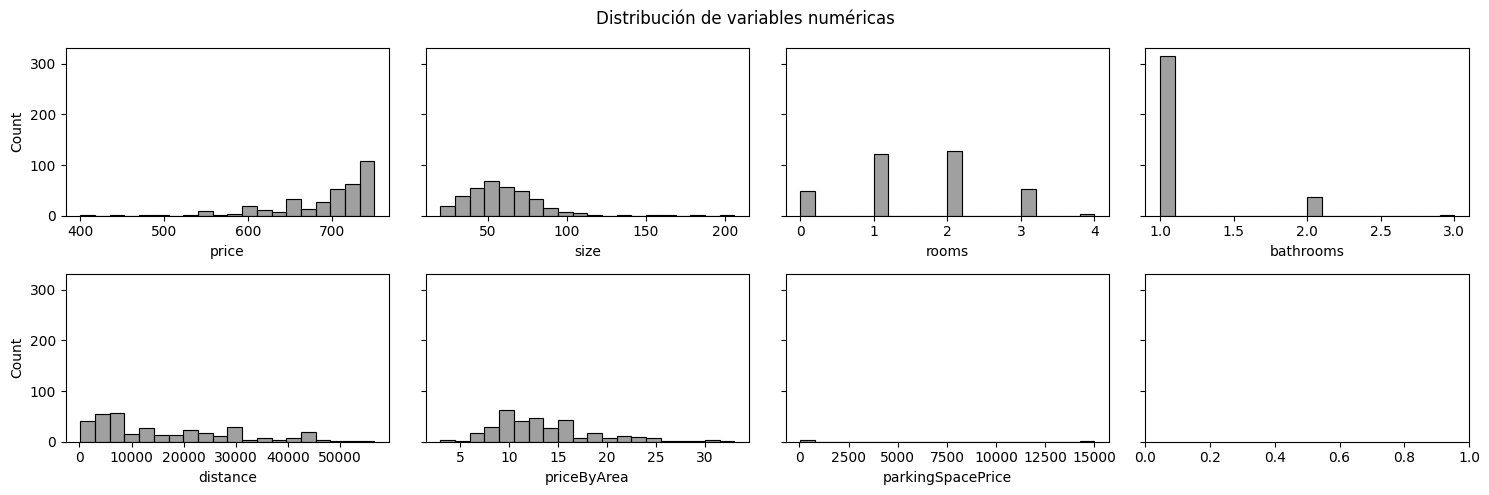

In [90]:
Visualizador.plot_numericas()           #Visualizamos las variables numericas para ver sus distribuciones.

In [91]:
df.head(2)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,showAddress,distance,status,newDevelopment,priceByArea,floor,district,neighborhood,hasLift,hasParkingSpace,isParkingSpaceIncludedInPrice,parkingSpacePrice,typology,subTypology
0,750.00,flat,60.00,True,1,1,Madrid,True,7037,good,False,13.00,3,Hortaleza,Canillas,True,None,None,NaN,flat,None
1,750.00,flat,70.00,True,2,1,San Sebastián de los Reyes,False,16145,good,False,11.00,bj,Centro Urbano,NaN,False,None,None,NaN,flat,None


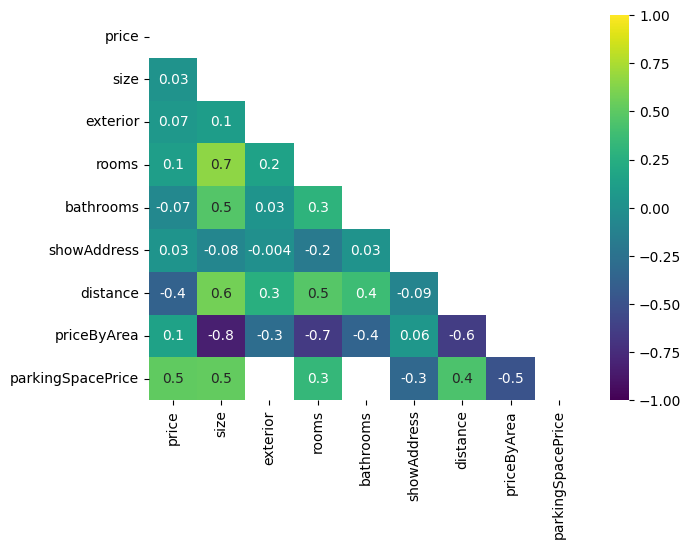

In [92]:
Visualizador.correlacion()                      #visualizamos la correlacion entre las variables

Observamos que tenemos una correlacion negativa fuerte entre tamaño y precio por area como podia ser logico.
No la vamos a eliminar.

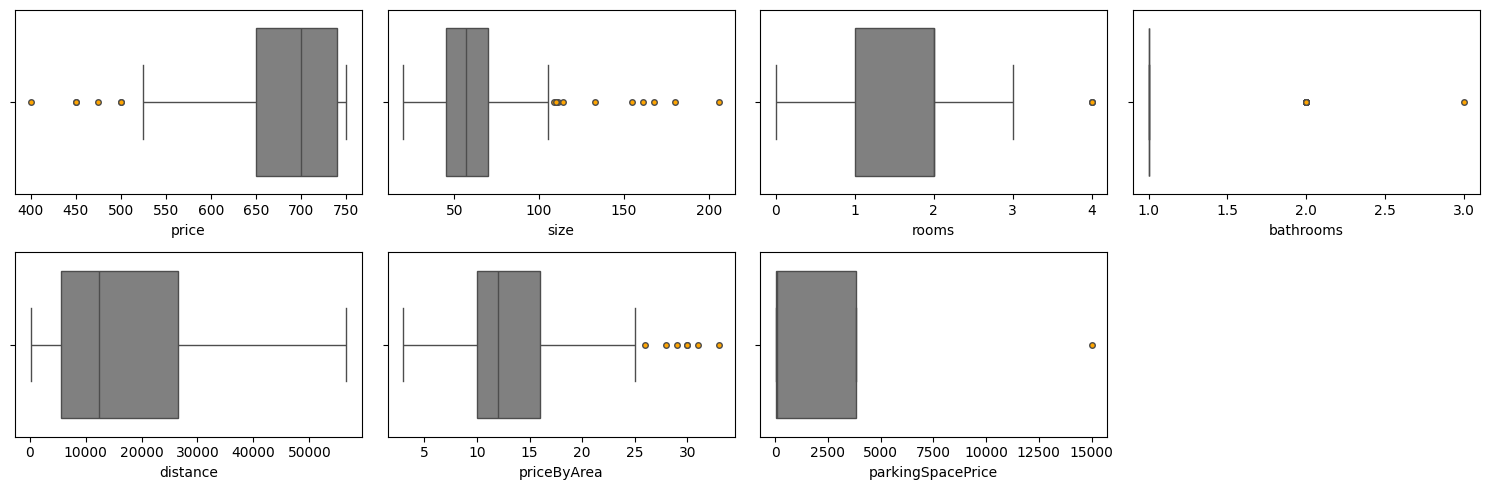

In [93]:
Visualizador.deteccion_outliers()               #visualizamos los outlaiers 

In [94]:
df['exterior'] = df['exterior'].astype('object') 
df['showAddress'] = df['showAddress'].astype('object') 

In [95]:
df.to_csv('datos/datos_post_eda.csv', index=False)